# Estimating the Price of Used Cars

## Import the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('vehicles.csv')
df=data

In [2]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## I-Data cleaning

In [3]:
# Shape of our data set
shape= df.shape
print(f"Our data set has {shape[0]} rows and {shape[1]} columns")

Our data set has 426880 rows and 26 columns


In [4]:
# Summary statistics
df.describe(include="all")

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,...,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,...,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,...,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


In [5]:
# General information about our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### a-Data cleaning

#### i-Duplicates

In [6]:
# Checking for duplicates
duplicates=df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, url, region, region_url, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, image_url, description, county, state, lat, long, posting_date]
Index: []

[0 rows x 26 columns]


We don't have duplicated rows in our dataset

#### ii-Missing values

In [7]:
# Checking for missing values

missing=df.isnull().sum()
missing=missing.sort_values(ascending=False)

missing_prop=df.isnull().sum()/len(df)*100
missing_prop=missing_prop.sort_values(ascending=False)

missing_table=pd.DataFrame({
    'Count':missing,
    'Percentage': missing_prop
})

print(missing_table)

               Count  Percentage
county        426880  100.000000
size          306361   71.767476
cylinders     177678   41.622470
condition     174104   40.785232
VIN           161042   37.725356
drive         130567   30.586347
paint_color   130203   30.501078
type           92858   21.752717
manufacturer   17646    4.133714
title_status    8242    1.930753
lat             6549    1.534155
long            6549    1.534155
model           5277    1.236179
odometer        4400    1.030735
fuel            3013    0.705819
transmission    2556    0.598763
year            1205    0.282281
description       70    0.016398
image_url         68    0.015930
posting_date      68    0.015930
url                0    0.000000
price              0    0.000000
state              0    0.000000
region_url         0    0.000000
region             0    0.000000
id                 0    0.000000


In [8]:
# ---Droping unnecessary columns---
cols_to_drop = ['county', 'size', 'VIN', 'description', 'image_url', 'url', 'posting_date', 'lat', 'long','region_url']
df.drop(columns=cols_to_drop, inplace=True)

#---Removing rows with missing value in most important columns---
essential_cols = ['year', 'manufacturer', 'model','type', 'odometer', 'fuel', 'transmission', 'title_status']
df.dropna(subset=essential_cols, inplace=True)

# ---Replacing NaN by "unknown" in other categorical variables---
cols_to_fill = ['cylinders', 'condition', 'drive', 'paint_color', 'type']
for col in cols_to_fill:
    df[col]=df.fillna('unknown', inplace=True)

#--- Verification---

print("\nTable after removing missings :")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Count': missing_values, 'Percentage': missing_percentage})
print(missing_info)



Table after removing missings :
               Count  Percentage
id                 0         0.0
region             0         0.0
price              0         0.0
year               0         0.0
manufacturer       0         0.0
model              0         0.0
condition          0         0.0
cylinders          0         0.0
fuel               0         0.0
odometer           0         0.0
title_status       0         0.0
transmission       0         0.0
drive              0         0.0
type          306976       100.0
paint_color        0         0.0
state              0         0.0


#### iii-Data types

In [9]:
#--- Changing the 'year' data type in year instead of float---

df.year=pd.to_datetime(df['year'], errors='coerce').dt.date
df.info() # to verify the data type change

<class 'pandas.core.frame.DataFrame'>
Index: 306976 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            306976 non-null  int64  
 1   region        306976 non-null  object 
 2   price         306976 non-null  int64  
 3   year          306976 non-null  object 
 4   manufacturer  306976 non-null  object 
 5   model         306976 non-null  object 
 6   condition     306976 non-null  object 
 7   cylinders     306976 non-null  object 
 8   fuel          306976 non-null  object 
 9   odometer      306976 non-null  float64
 10  title_status  306976 non-null  object 
 11  transmission  306976 non-null  object 
 12  drive         306976 non-null  object 
 13  type          0 non-null       object 
 14  paint_color   306976 non-null  object 
 15  state         306976 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 39.8+ MB


In [10]:
df.drop(columns=['cylinders','paint_color','condition','drive', 'type'], inplace=True) 


In [11]:
# Reseting the index
df = df.reset_index(drop=True)
df

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
0,7316814884,auburn,33590,1970-01-01,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,al
1,7316814758,auburn,22590,1970-01-01,chevrolet,silverado 1500,gas,71229.0,clean,other,al
2,7316814989,auburn,39590,1970-01-01,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,al
3,7316743432,auburn,30990,1970-01-01,toyota,tundra double cab sr,gas,41124.0,clean,other,al
4,7316356412,auburn,15000,1970-01-01,ford,f-150 xlt,gas,128000.0,clean,automatic,al
...,...,...,...,...,...,...,...,...,...,...,...
306971,7301591192,wyoming,23590,1970-01-01,nissan,maxima s sedan 4d,gas,32226.0,clean,other,wy
306972,7301591187,wyoming,30590,1970-01-01,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,wy
306973,7301591147,wyoming,34990,1970-01-01,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,wy
306974,7301591140,wyoming,28990,1970-01-01,lexus,es 350 sedan 4d,gas,30112.0,clean,other,wy


#### iv-Feature engineering

In [11]:
df = df[df['price'] >= 500].copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278364 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            278364 non-null  int64  
 1   region        278364 non-null  object 
 2   price         278364 non-null  int64  
 3   year          278364 non-null  object 
 4   manufacturer  278364 non-null  object 
 5   model         278364 non-null  object 
 6   fuel          278364 non-null  object 
 7   odometer      278364 non-null  float64
 8   title_status  278364 non-null  object 
 9   transmission  278364 non-null  object 
 10  state         278364 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 25.5+ MB


We noticed that the "model" column has 18907 modalities so we will
try to reduce it by defining rares cars and other models.  On average, a model appears 16 times, and we have a car model that appears 5362 times.

In [14]:
print(df.model.value_counts().describe())

count    17566.000000
mean        15.846749
std         92.650613
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       5362.000000
Name: count, dtype: float64


In [15]:
#---Cardinality reduction---
model_counts = df['model'].value_counts()

# --- Finding the best thereshold ---
# We want to find the number of models that represent 85% of all advertisements.
target_percentage = 0.85
total_rows = len(df)

cumulative_sum = model_counts.cumsum()
num_models_to_keep = (cumulative_sum < total_rows * target_percentage).sum() + 1

print(f"To cover {target_percentage*100}% of our data, we have to keep the {num_models_to_keep} most frequent models.")

# Now, let's find the corresponding frequency threshold.

if num_models_to_keep < len(model_counts):
    
    ideal_threshold = model_counts.iloc[num_models_to_keep - 1] 
    print(f"The ideal frequency threshold to achieve this goal is : {ideal_threshold}")
else:
    print("All models are importants.")

# --- Apply the new thereshold ---

if 'ideal_threshold' in locals():
    # creating a copy
    df_processed = df.copy()
    
    rare_models = model_counts[model_counts < ideal_threshold].index
    df_processed['model'] = df_processed['model'].replace(rare_models, 'other')
    
    final_model_count = df_processed['model'].nunique()
    print(f"\nWith thershold of{ideal_threshold}, The number of unique models is now : {final_model_count}")
    

To cover 85.0% of our data, we have to keep the 2449 most frequent models.
The ideal frequency threshold to achieve this goal is : 14

With thershold of14, The number of unique models is now : 2569


In [16]:
# 1. Number of models to keep
N = 200 

# 2. N most frequent models
top_n_models = model_counts.head(N).index
print(f"we will keep {N} most frequent models.")

import numpy as np

# If a model is in our top_n_models list, we keep it; otherwise, we replace it with “other”..
df['model_reduced'] = np.where(df['model'].isin(top_n_models), df['model'], 'other')

# --- Verification ---
final_model_count = df['model_reduced'].nunique()
print(f"\nThe final number of categories for the model is now : {final_model_count}") 


print("\nDistribution of new categories :")
print(df['model_reduced'].value_counts())

# "Other percentage
other_percentage = (df['model_reduced'] == 'other').mean() * 100
print(f"\nPercentage of ads in the category 'other' : {other_percentage:.2f}%")

we will keep 200 most frequent models.

The final number of categories for the model is now : 201

Distribution of new categories :
model_reduced
other                         153735
f-150                           5362
silverado 1500                  3391
1500                            2754
camry                           2058
                               ...  
pickup 1500                      229
sierra 1500 double cab sle       229
sierra 1500 crew cab slt         229
g6                               227
altima 2.5 s                     226
Name: count, Length: 201, dtype: int64

Percentage of ads in the category 'other' : 55.23%


The 200 most popular models alone account for approximately 45.53% of all listings. This confirms how concentrated the market is on a relatively small number of models.

#### v-Checking for outliers

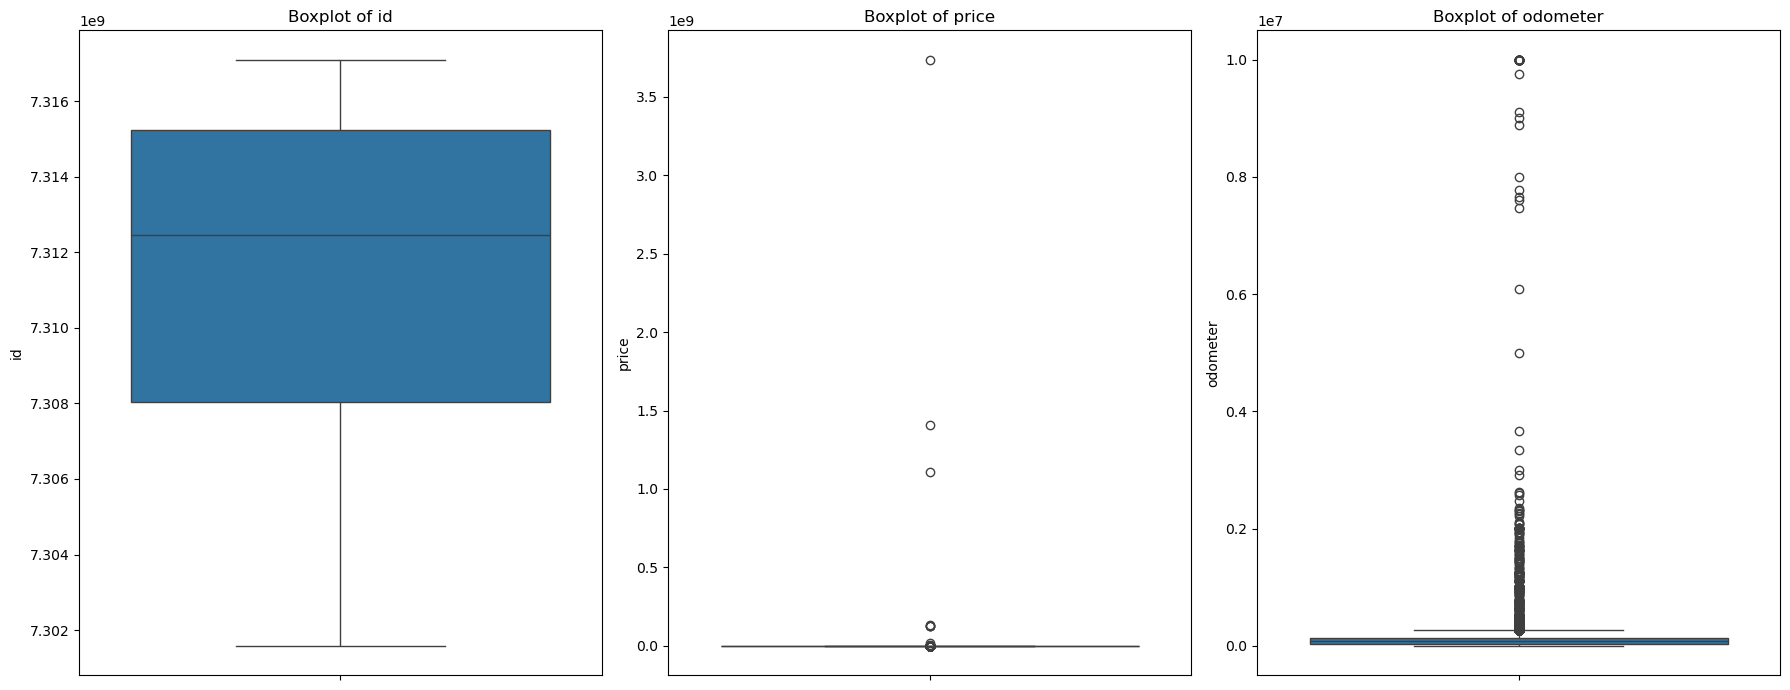

In [17]:
# ---Boxplot to see the outliers of numerical columns---

df_num=df.select_dtypes(include='number')
fig, axes = plt.subplots(1, len(df_num.columns), figsize=(6 * len(df_num.columns), 7))

# If we have just one numerical column, axes will not be a list
if len(df_num.columns) == 1:
    axes = [axes]

for i, col in enumerate(df_num.columns):
    sns.boxplot(y=df_num[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [18]:
# Detecting outliers using Inter quartile range and capped them
print(f"Size of the DataFrame before outlier processing : {len(df)}")

# --- Step 1: FILTERING outliers from the target variable 'price' ---

# We remove the lowest 1% and the highest 1% of prices.
price_lower_bound = df['price'].quantile(0.01)
price_upper_bound = df['price'].quantile(0.99)

print(f"\nFiltering prices outside the range [{price_lower_bound:.2f}, {price_upper_bound:.2f}]...")

# Only lines within these boundaries are retained.
df_filtered = df[(df['price'] >= price_lower_bound) & (df['price'] <= price_upper_bound)].copy()

print(f"DataFrame size after filtering on price : {len(df_filtered)}")
print(f"{len(df) - len(df_filtered)} rows deleted.")

# --- Step 2: CAPPING outliers on OTHER numerical variables ---

def cap_outliers_except_target(df_in, target_col='price'):
    """
    Applies IQR capping to all numeric columns EXCEPT the target column.
    """
    df = df_in.copy()
    
   # Select the numerical columns to be processed (all except the target)
    numeric_cols_to_cap = df.select_dtypes(include=np.number).columns.drop(target_col, errors='ignore')
    
    print(f"\n Capping Application  : {list(numeric_cols_to_cap)}")
    
    for col in numeric_cols_to_cap:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        df[col] = np.clip(df[col], a_min=lower_bound, a_max=upper_bound)
        
    return df

# Apply the capping function to our already filtered DataFrame
df_final = cap_outliers_except_target(df_filtered)

print("\nOutlier processing completed.")

Size of the DataFrame before outlier processing : 278364

Filtering prices outside the range [1300.00, 66990.00]...
DataFrame size after filtering on price : 272859
5505 rows deleted.

 Capping Application  : ['id', 'odometer']

Outlier processing completed.


In [19]:
df_final.select_dtypes(include='number').head()

,id,price,odometer
27,7316814884,33590,57923.0
28,7316814758,22590,71229.0
29,7316814989,39590,19160.0
30,7316743432,30990,41124.0
31,7316356412,15000,128000.0


## II-Exploratory data analysis

### 1-Univariate analysis

#### a- Numerical columns

In [20]:
#Summary statistics
df_final_num = df_final.select_dtypes(include='number').copy()
df_final_num['yr'] = pd.to_datetime(df_final['year'], errors='coerce').dt.year

df_final_num.describe(include='all')

,id,price,odometer,yr
count,2.728590e+05,272859.000000,272859.000000,272859.0
mean,7.311425e+09,19761.678808,88028.543882,1970.0
std,4.397585e+06,12954.072355,61041.362046,0.0
min,7.301583e+09,1300.000000,0.000000,1970.0
25%,7.308028e+09,8945.000000,34811.000000,1970.0
50%,7.312437e+09,16999.000000,81203.000000,1970.0
75%,7.315214e+09,28598.500000,129700.000000,1970.0
max,7.317101e+09,66990.000000,272033.500000,1970.0


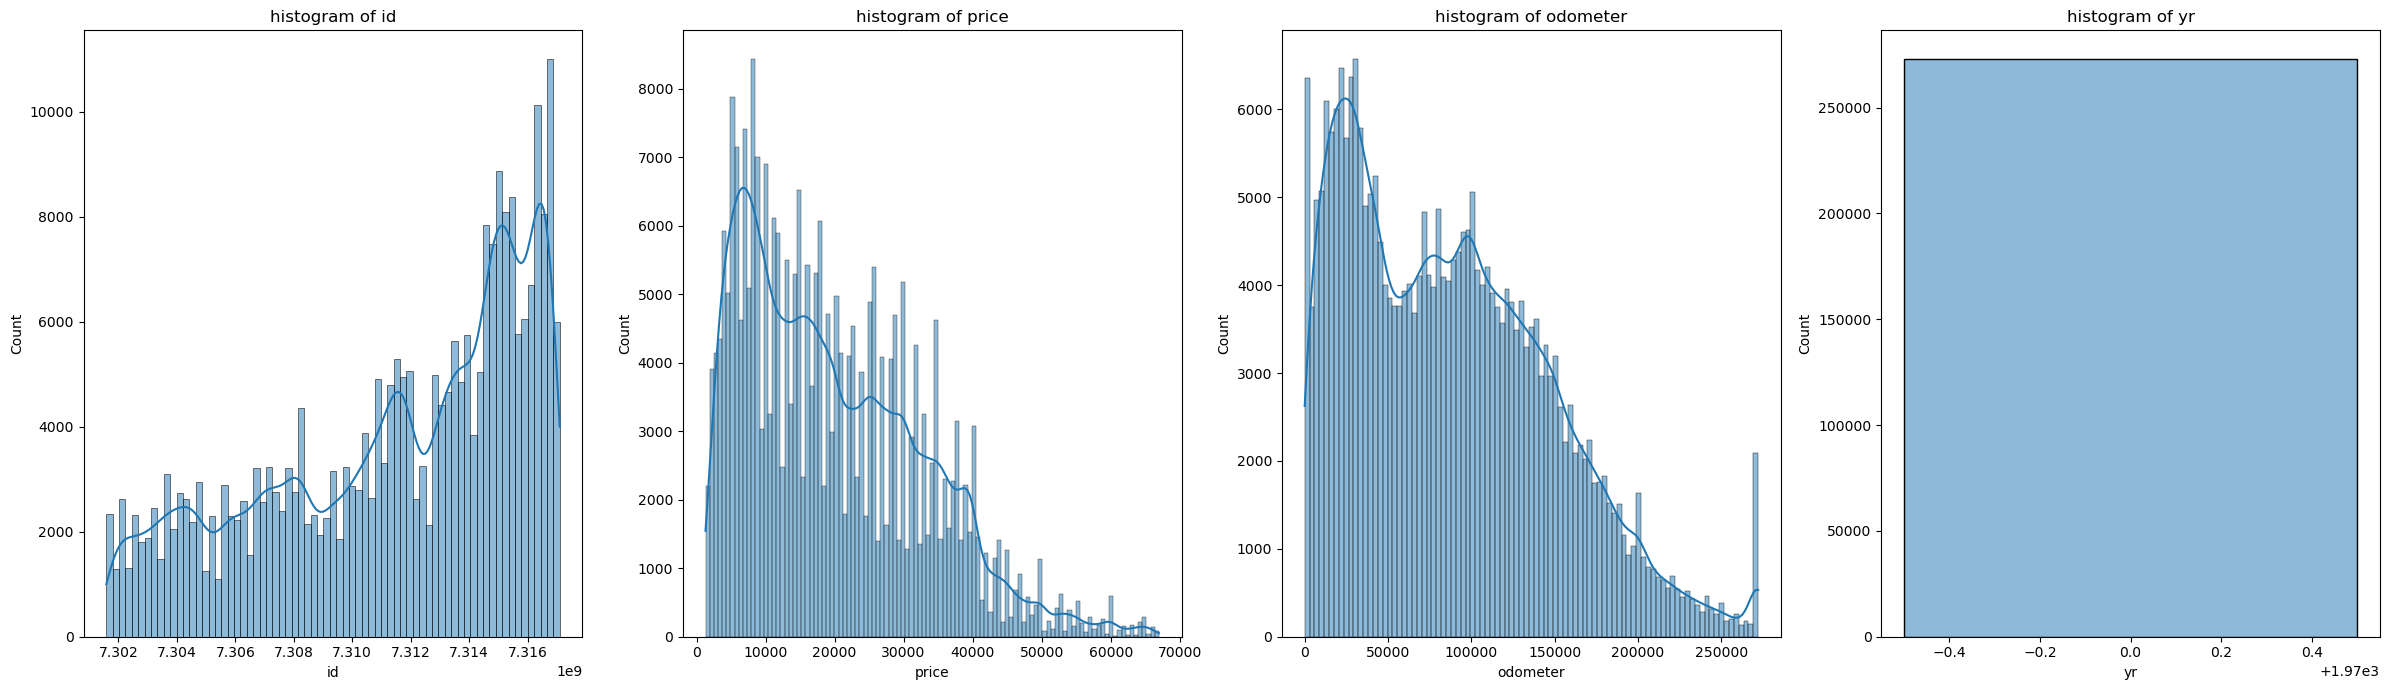

In [21]:
fig, axes = plt.subplots(1, len(df_final_num.columns), figsize=(6 * len(df_final_num.columns), 7))

# If we have just one numerical column, axes will not be a list
if len(df_final_num.columns) == 1:
    axes = [axes]

for i, col in enumerate(df_final_num.columns):
    sns.histplot(x=df_final_num[col], kde=True, ax=axes[i])
    axes[i].set_title(f'histogram of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

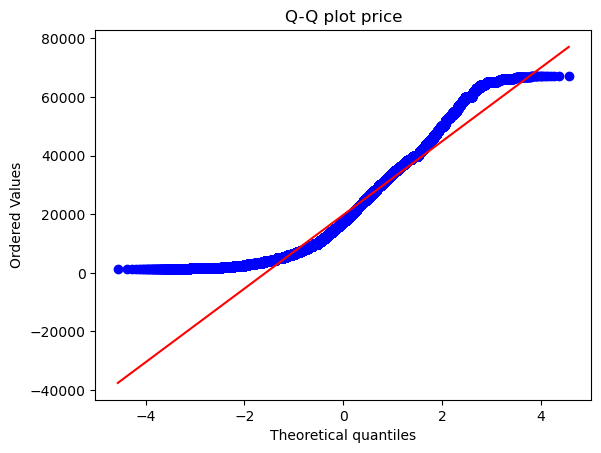

In [22]:
#---Q-Q plot for the price
from scipy import stats

plt.figure()
stats.probplot(df_final['price'], plot=plt)
plt.title('Q-Q plot price')
plt.show()

In [23]:
#We can also verify it with shapito wilk test and kolgomorov smirvov
from scipy.stats import shapiro
from scipy.stats import kstest, norm

# Shapiro test
shapiro_test = shapiro(df_final['price'])
p_value = shapiro_test.pvalue
print('shapiro p value= ', p_value)

#ks test
standardized = (df_final['price'] - df_final['price'].mean()) / df_final['price'].std()

# KS test
ks_test = kstest(standardized, 'norm')
print('ks test p value= ',ks_test.pvalue)

shapiro p value=  8.23106590602011e-118
ks test p value=  0.0


C:\Users\Yves-Ricky\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 272859.
  res = hypotest_fun_out(*samples, **kwds)


#### b-Categorical features

In [24]:
df_final_cat=df_final.select_dtypes(include='object')


C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_71772\382427365.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top, y=col, order=top_categories, palette='viridis', ax=ax)
C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_71772\382427365.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2', ax=ax)
C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_71772\382427365.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top, y=col, order=top_categories, palette='viridis', ax=ax)

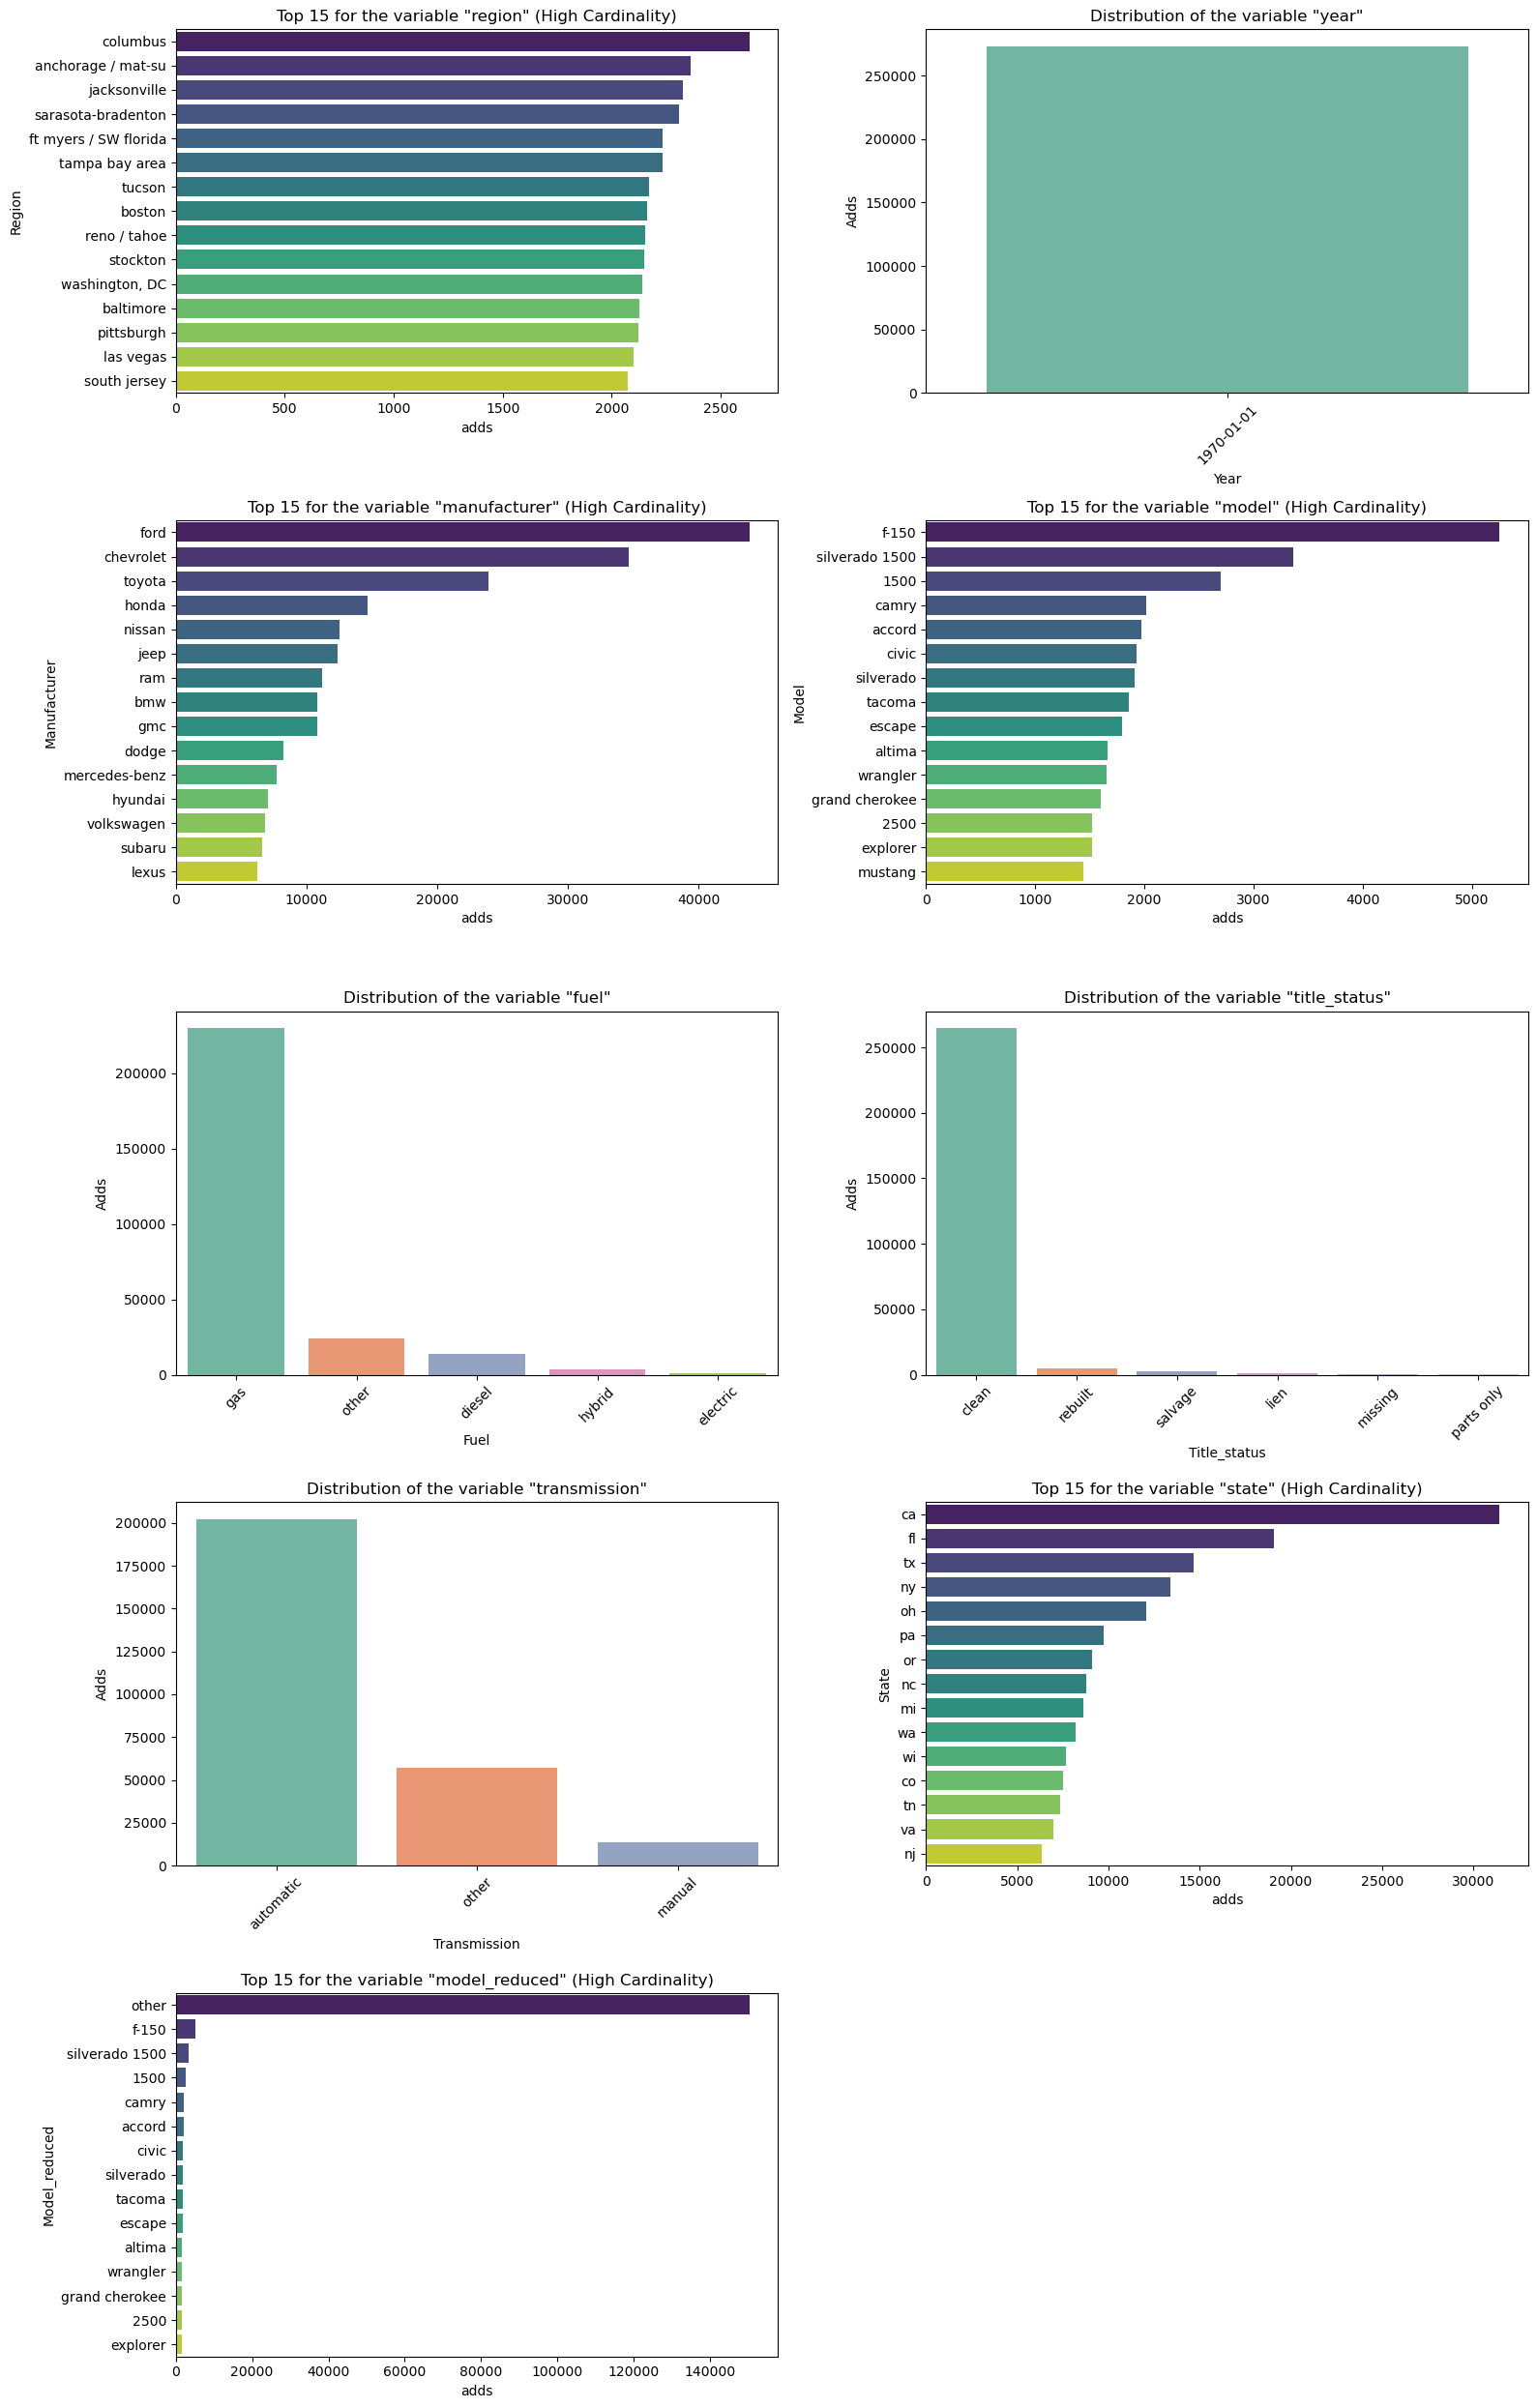

In [25]:
#Countplot for categorical variables

import matplotlib.pyplot as plt
import seaborn as sns
#List of categorical variables
df_categorical_cols = df_final.select_dtypes(include='object').columns.tolist()

def plot_categorical_distributions(df, categorical_cols, top_n=15):
    """
    Displays the distribution of categorical variables.
For variables with many categories, only displays the top N
    """
    n_cols = 2
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(n_cols * 8, n_rows * 5))

    for i, col in enumerate(categorical_cols):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        
        # Decide on the visualisation strategy based on the number of categories
        if df[col].nunique() > top_n:
            # --- High Cardinality: Display Top N ---
            # We take the N most frequent categories
            top_categories = df[col].value_counts().nlargest(top_n).index
            
            # We filter the DataFrame to keep only these categories.
            df_top = df[df[col].isin(top_categories)]
            
            # plotting the graphs
            sns.countplot(data=df_top, y=col, order=top_categories, palette='viridis', ax=ax)
            ax.set_title(f'Top {top_n} for the variable "{col}" (High Cardinality)')
            ax.set_xlabel('adds')
            ax.set_ylabel(col.capitalize())
            
        else:
            # --- Low Cardinality: Show all ---
            order = df[col].value_counts().index
            sns.countplot(data=df, x=col, order=order, palette='Set2', ax=ax)
            ax.set_title(f'Distribution of the variable "{col}"')
            ax.set_xlabel(col.capitalize())
            ax.set_ylabel('Adds')
            plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# --- calling the function ---
plot_categorical_distributions(df_final, df_categorical_cols)

### 2-Bivariate analysis

#### Bivariate analysis between price and numerical columns

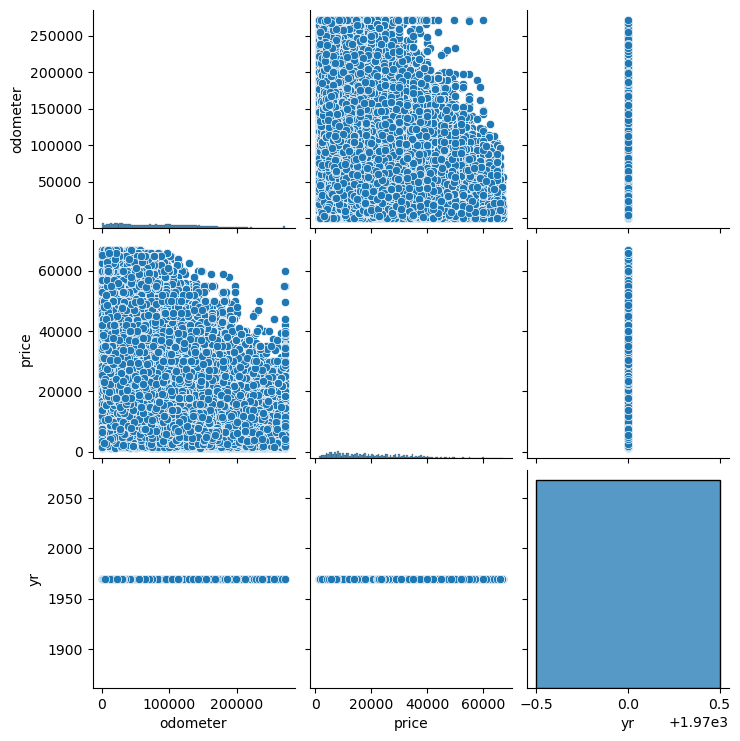

In [26]:
# Pairplot between price and odometer
sns.pairplot(df_final_num[['odometer', 'price', 'yr']])
plt.show()

In [27]:
# Spearman correlation test
from scipy.stats import spearmanr

# Spearman test
rho, p_value = spearmanr(df_final['price'], df_final['odometer'])

print(f"Spearman coeff : {rho}")
print(f"P-value : {p_value}")


Spearman coeff : -0.6463929473947547
P-value : 0.0


#### 3-Logarithm transformation of the target feature "price"


Validation of the distribution of “price_log” after final processing :


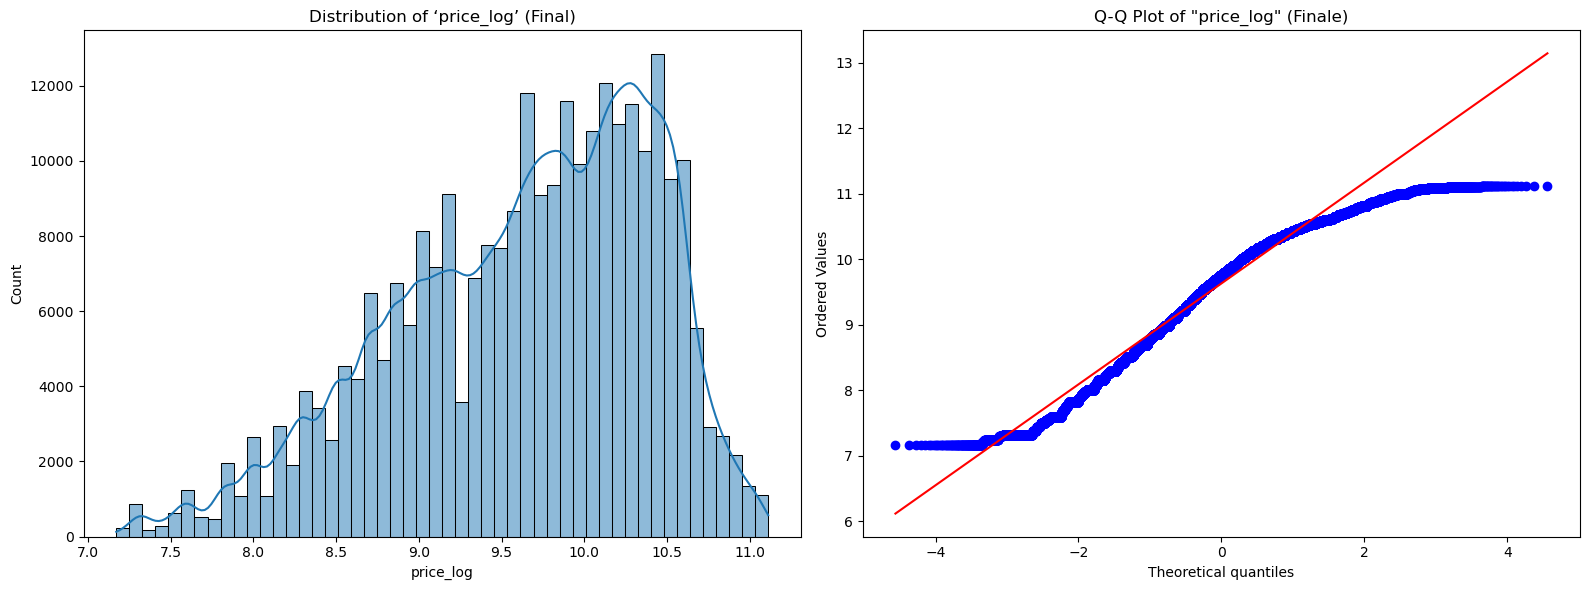


Information about the final DataFrame ready for modelling :
<class 'pandas.core.frame.DataFrame'>
Index: 272859 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             272859 non-null  int64  
 1   region         272859 non-null  object 
 2   price          272859 non-null  int64  
 3   year           272859 non-null  object 
 4   manufacturer   272859 non-null  object 
 5   model          272859 non-null  object 
 6   fuel           272859 non-null  object 
 7   odometer       272859 non-null  float64
 8   title_status   272859 non-null  object 
 9   transmission   272859 non-null  object 
 10  state          272859 non-null  object 
 11  model_reduced  272859 non-null  object 
 12  price_log      272859 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 29.1+ MB


In [28]:
# Create the logarithmic transformation on the final DataFrame
df_final['price_log'] = np.log1p(df_final['price'])

# View the distribution and the Q-Q plot
print("\nValidation of the distribution of “price_log” after final processing :")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(df_final['price_log'], kde=True, bins=50, ax=axes[0])
axes[0].set_title('Distribution of ‘price_log’ (Final)')

# Q-Q Plot
stats.probplot(df_final['price_log'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of "price_log" (Finale)')

plt.tight_layout()
plt.show()

#Display information about the final DataFrame that will be used for modelling
print("\nInformation about the final DataFrame ready for modelling :")
df_final.info()

In [31]:
df_final.to_csv('df_cleaned.csv', index=False)